In [1]:
import joblib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm
import scipy.stats as stats
import random
import glob
import os
import re

import utilities as ut
import modularised_utils as mut
from load_results import load_results, list_available_results


from matplotlib.animation import FuncAnimation
from IPython.display import HTML

sns.set_theme(style="whitegrid")
seed = 42
np.random.seed(seed)

[KeOps] Warning : CUDA libraries not found or could not be loaded; Switching to CPU only.


In [2]:
# list_available_results()

In [3]:
experiment = 'slc'
type       = 'gaussian'
path = f"data/{experiment}/results"
saved_folds = joblib.load(f"data/{experiment}/cv_folds.pkl")

# Load the original data dictionary
all_data      = ut.load_all_data(experiment)

Dll_samples   = all_data['LLmodel']['data']
Dhl_samples   = all_data['HLmodel']['data']
I_ll_relevant = all_data['LLmodel']['intervention_set']
omega         = all_data['abstraction_data']['omega']
ll_var_names  = list(all_data['LLmodel']['graph'].nodes())
hl_var_names  = list(all_data['HLmodel']['graph'].nodes())

if experiment == 'slc':
    noise_max = 5.0
else:
    noise_max = 10.0

Data loaded for 'slc'.


In [2]:
label_map_empirical = {
                        'DIROCA (eps_0.107_delta_0.035)': 'DiRoCA_star',
                        'DIROCA (eps_1.0_delta_1.0)': 'DIROCA_1',
                        'DIROCA (eps_2.0_delta_2.0)': 'DIROCA_2',
                        'DIROCA (eps_4.0_delta_4.0)': 'DIROCA_4',
                        'DIROCA (eps_8.0_delta_8.0)': 'DIROCA_8',
                        'GradCA': 'GradCA',
                        'BARYCA': 'BARYCA',
                        'Abs-LiNGAM (Perfect)': 'Abslin_p',
                        'Abs-LiNGAM (Noisy)': 'Abslin_n'
                    }
label_map_gaussian = {
                        'DIROCA (eps_delta_0.111)': 'DiRoCA_star',
                        'DIROCA (eps_delta_1)': 'DIROCA_1',
                        'DIROCA (eps_delta_2)': 'DIROCA_2',
                        'DIROCA (eps_delta_4)': 'DIROCA_4',
                        'DIROCA (eps_delta_8)': 'DIROCA_8',
                        'GradCA': 'GradCA',
                        'BARYCA': 'BARYCA'
                    }

print_label_map  = {
                        'DiRoCA_star':  r'DiRoCA$_{\epsilon_\ell^*, \epsilon_h^*}$',
                        'DIROCA_1':     r'DiRoCA$_{1,1}$',
                        'DIROCA_2':     r'DiRoCA$_{2,2}$',
                        'DIROCA_4':     r'DiRoCA$_{4,4}$',
                        'DIROCA_8':     r'DiRoCA$_{8,8}$',
                        'GradCA':       r'GRAD$_{(\tau, \omega)}$',
                        'BARYCA':       r'GRAD$_{\text{bary}}$',
                        'Abslin_p':     r'AbsLin$_{\text{p}}$', 
                        'Abslin_n':     r'AbsLin$_{\text{n}}$'
                    }

In [17]:
# for type in ['empirical', 'gaussian']:
#     for experiment in ['lilucas', 'slc']:
#         path = f"data/{experiment}/results"
#         saved_folds = joblib.load(f"data/{experiment}/cv_folds.pkl")

#         # Load the original data dictionary
#         all_data      = ut.load_all_data(experiment)

#         Dll_samples   = all_data['LLmodel']['data']
#         Dhl_samples   = all_data['HLmodel']['data']
#         I_ll_relevant = all_data['LLmodel']['intervention_set']
#         omega         = all_data['abstraction_data']['omega']
#         ll_var_names  = list(all_data['LLmodel']['graph'].nodes())
#         hl_var_names  = list(all_data['HLmodel']['graph'].nodes())

#         if experiment == 'slc':
#             noise_max = 5.0
#         else:
#             noise_max = 10.0

#         final_results_df = load_results(
#                                     experiment=experiment,
#                                     evaluation_type=type,
#                                     shift_type='additive',
#                                     distribution='gaussian',
#                                     alpha_steps=10,
#                                     alpha_min=0.0,
#                                     alpha_max=1.0,
#                                     noise_steps=20,
#                                     noise_min=0.0,
#                                     noise_max=noise_max,
#                                     trials=20,
#                                     zero_mean=True
#                                 )
#         if type == 'empirical':
#             final_results_df['method'] = final_results_df['method'].replace(label_map_empirical)
#         elif type == 'gaussian':
#             final_results_df['method'] = final_results_df['method'].replace(label_map_gaussian)

#         # Enhanced Plotting Code for Empirical Analysis
#         # Copy this code into a new cell in your empirical_analysis.ipynb

#         # Enable LaTeX rendering
#         plt.rcParams.update({
#             "text.usetex": True,
#             "font.family": "serif",
#             "font.serif": ["Computer Modern Roman"],
#             "text.latex.preamble": r"\usepackage{amsmath} \usepackage{amssymb}"
#         })

#         methods_to_plot = [
#             'DiRoCA_star',
#             #'DIROCA_1',
#             'DIROCA_2', 
#             #'DIROCA_4',
#             #'DIROCA_8',
#             'GradCA',
#             'BARYCA',
#             'Abslin_p',
#             'Abslin_n'
#         ]

#         # alpha_to_plot = 1.0

#         # # Filter data for selected alpha and methods
#         # df_subset = final_results_df[
#         #     (final_results_df['alpha'] == alpha_to_plot) & 
#         #     (final_results_df['method'].isin(methods_to_plot))
#         # ]

#         # if df_subset.empty:
#         #     print(f"Warning: No data found for alpha ≈ {alpha_to_plot}. Please check the 'alpha_values' in your experiment.")
#         # else:
#         #     df_for_plotting = df_subset.copy()
#         #     df_for_plotting['display_name'] = df_for_plotting['method'].map(print_label_map)

#         #     plt.figure(figsize=(9, 10))
#         #     sns.lineplot(
#         #         data=df_for_plotting,
#         #         x='noise_scale',
#         #         y='error',
#         #         hue='display_name',
#         #         marker='o',
#         #         linewidth=2.0,
#         #         markersize=8,
#         #         errorbar= 'sd' #('ci', 95) # Shaded area is the 95% CI across folds and trials
#         #     )
            
#         #     # No title as requested
#         #     plt.xlabel(r'$\sigma_{noise}$', fontsize=34)
#         #     plt.ylabel(r'Abstraction Error', fontsize=32)
#         #     plt.legend(fontsize=20, bbox_to_anchor=(0.5, -0.15), loc='upper center', ncol=4)
#         #     plt.grid(True, which='both', linestyle='--', alpha=0.7)
            
#         #     # Increase tick label sizes
#         #     plt.xticks(fontsize=25)
#         #     plt.yticks(fontsize=25)
            
#         #     plt.tight_layout()
#         #     plt.savefig(f'{experiment}_{type}_alpha_fixed_{alpha_to_plot}.png', dpi=300, bbox_inches='tight')
#         #     plt.show()

#         # # Alternative version for plotting against alpha (fixing noise)
#         # print("\n" + "="*60)
#         # print("Alternative: Plotting against alpha (fixing noise)")
#         # print("="*60)

#         noise_level_to_plot = noise_max

#         # Filter data for selected noise level and methods
#         df_subset_alpha = final_results_df[
#             (final_results_df['noise_scale'] == noise_level_to_plot) & 
#             (final_results_df['method'].isin(methods_to_plot))
#         ]

#         if df_subset_alpha.empty:
#             print(f"Warning: No data found for noise_scale ≈ {noise_level_to_plot}.")
#         else:
#             df_for_plotting_alpha = df_subset_alpha.copy()
#             df_for_plotting_alpha['display_name'] = df_for_plotting_alpha['method'].map(print_label_map)

#             plt.figure(figsize=(9, 10))
#             sns.lineplot(
#                 data=df_for_plotting_alpha,
#                 x='alpha',
#                 y='error',
#                 hue='display_name',
#                 marker='o',
#                 linewidth=2.0,
#                 markersize=8,
#                 errorbar= 'sd' #('ci', 95)
#             )
            
#             plt.xlabel(r'$\alpha$', fontsize=34)
#             plt.ylabel(r'Abstraction Error', fontsize=32)
#             #plt.legend(fontsize=20)
#             plt.legend(fontsize=20, bbox_to_anchor=(0.5, -0.15), loc='upper center', ncol=4)

#             plt.grid(True, which='both', linestyle='--', alpha=0.7)
            
#             # Increase tick label sizes
#             plt.xticks(fontsize=25)
#             plt.yticks(fontsize=25)
            
#             plt.tight_layout()
#             plt.savefig(f'{experiment}_{type}_noise_fixed_{noise_level_to_plot}.png', dpi=300, bbox_inches='tight')
#             plt.show()


In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

# Methods you want in final plot
methods_to_plot = [
    'DiRoCA_star', 'DIROCA_2', 'GradCA', 'BARYCA', 'Abslin_p', 'Abslin_n'
]

# Display names (LaTeX)
display_names = [print_label_map[m] for m in methods_to_plot]

# Color palette — consistent for both subplots
palette_colors = sns.color_palette('colorblind', n_colors=len(display_names))
color_map = dict(zip(display_names, palette_colors))

# Style map with dash patterns (tuples of floats)
style_map = {
    print_label_map['DiRoCA_star']: (4, 2),      # dashed
    print_label_map['DIROCA_2']: (1, 1),         # dotted
    print_label_map['GradCA']: (3, 1, 1, 1),     # dash-dot-dot
    print_label_map['BARYCA']: (5, 2),           # long dash
    print_label_map['Abslin_p']: (2, 2),         # short dash
    print_label_map['Abslin_n']: (6, 1, 2, 1),   # custom pattern
}


Data loaded for 'slc'.
Loading: evaluation_additive_gaussian_alpha10-0.0-1.0_noise20-0.0-5.0_trials20_zero_meanTrue_20250726_132833.csv
Parameters: gaussian additive gaussian, α: 10 steps (0.0-1.0), noise: 20 steps (0.0-5.0), trials: 20, zero_mean: True
Data loaded for 'slc'.
Loading: empirical_evaluation_additive_gaussian_alpha10-0.0-1.0_noise20-0.0-5.0_trials20_zero_meanTrue_20250727_113949.csv
Parameters: empirical additive gaussian, α: 10 steps (0.0-1.0), noise: 20 steps (0.0-5.0), trials: 20, zero_mean: True


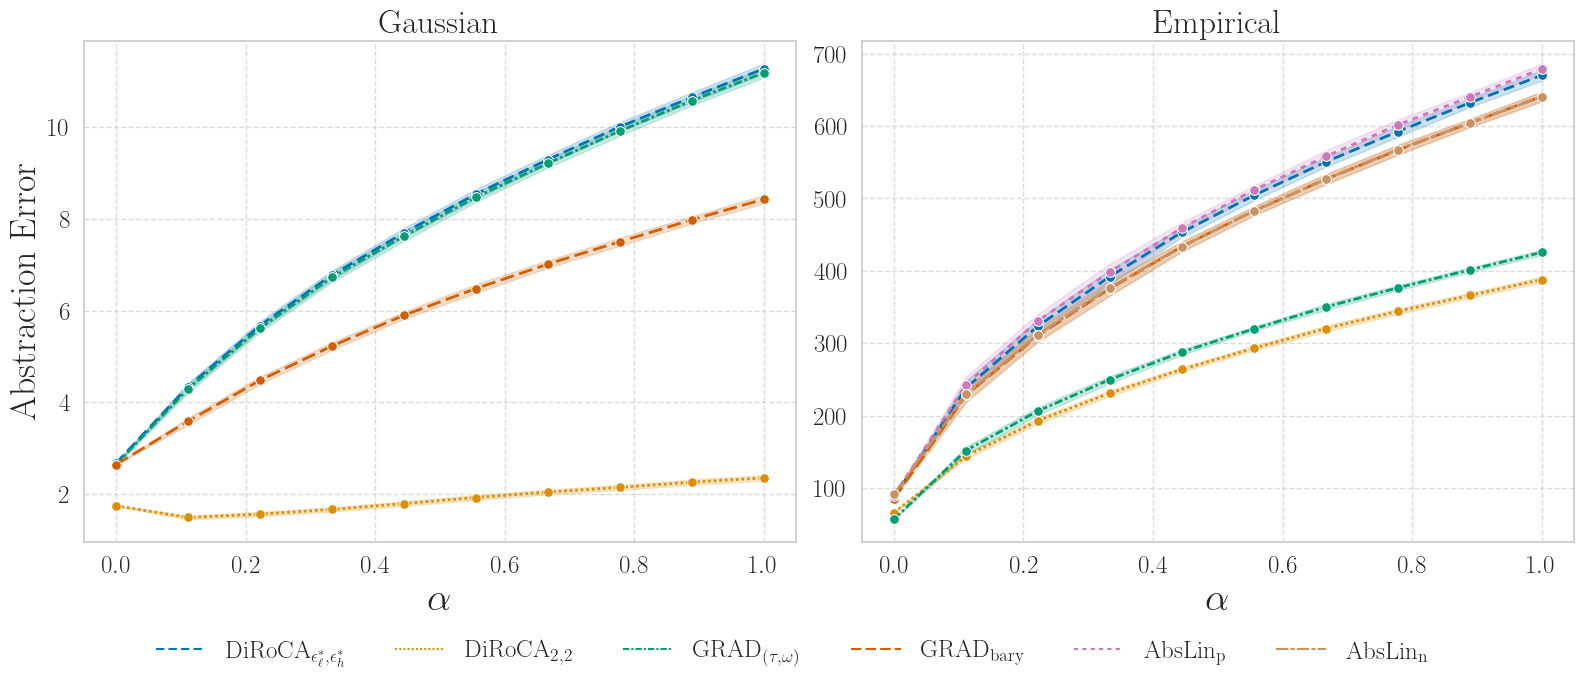

Data loaded for 'lilucas'.
Loading: evaluation_additive_gaussian_alpha10-0.0-1.0_noise20-0.0-10.0_trials20_zero_meanTrue_20250726_160926.csv
Parameters: gaussian additive gaussian, α: 10 steps (0.0-1.0), noise: 20 steps (0.0-10.0), trials: 20, zero_mean: True
Data loaded for 'lilucas'.
Loading: empirical_evaluation_additive_gaussian_alpha10-0.0-1.0_noise20-0.0-10.0_trials20_zero_meanTrue_20250727_132334.csv
Parameters: empirical additive gaussian, α: 10 steps (0.0-1.0), noise: 20 steps (0.0-10.0), trials: 20, zero_mean: True


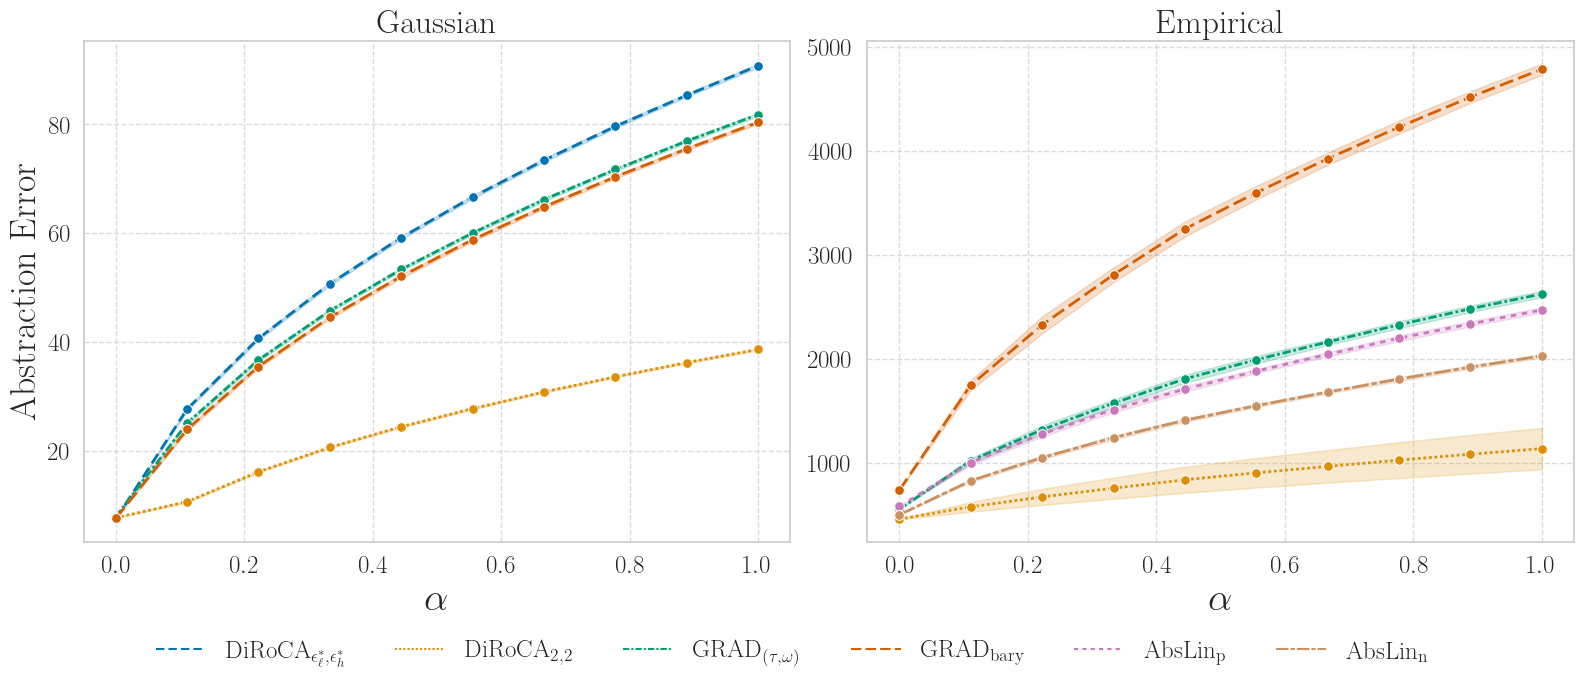

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Seaborn + Matplotlib styles
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "serif",
    "font.serif": ["Computer Modern Roman"],
    "text.latex.preamble": r"\usepackage{amsmath} \usepackage{amssymb}"
})

# 1. Method keys and LaTeX labels
methods_to_plot = [
    'DiRoCA_star', 'DIROCA_2', 'GradCA', 'BARYCA', 'Abslin_p', 'Abslin_n'
]
display_names = [print_label_map[m] for m in methods_to_plot]

# 2. Colors (shared across both noise types)
palette_colors = sns.color_palette('colorblind', n_colors=len(display_names))
color_map = dict(zip(display_names, palette_colors))

# 3. Dash styles
style_map = {
    print_label_map['DiRoCA_star']: (4, 2),
    print_label_map['DIROCA_2']: (1, 1),
    print_label_map['GradCA']: (3, 1, 1, 1),
    print_label_map['BARYCA']: (5, 2),
    print_label_map['Abslin_p']: (2, 2),
    print_label_map['Abslin_n']: (6, 1, 2, 1),
}

# 4. Noise levels
noise_level_to_plot = {
    'slc': 5.0,
    'lilucas': 10.0
}

# 5. Loop through experiments
for experiment in ['slc', 'lilucas']:
    fig, axes = plt.subplots(1, 2, figsize=(16, 7), sharey=False)

    combined_handles = {}

    for i, noise_type in enumerate(['gaussian', 'empirical']):
        all_data = ut.load_all_data(experiment)

        df = load_results(
            experiment=experiment,
            evaluation_type=noise_type,
            shift_type='additive',
            distribution='gaussian',
            alpha_steps=10,
            alpha_min=0.0,
            alpha_max=1.0,
            noise_steps=20,
            noise_min=0.0,
            noise_max=noise_level_to_plot[experiment],
            trials=20,
            zero_mean=True
        )

        # Apply method renaming
        if noise_type == 'empirical':
            df['method'] = df['method'].replace(label_map_empirical)
        else:
            df['method'] = df['method'].replace(label_map_gaussian)

        # Filter methods and noise level
        df = df[(df['noise_scale'] == noise_level_to_plot[experiment]) &
                (df['method'].isin(methods_to_plot))].copy()
        
        if df.empty:
            print(f"No data for {noise_type} in {experiment}")
            continue

        df['display_name'] = df['method'].map(print_label_map)

        ax = axes[i]
        sns.lineplot(
            data=df,
            x='alpha',
            y='error',
            hue='display_name',
            hue_order=display_names,
            palette=color_map,
            style='display_name',
            style_order=display_names,
            dashes=style_map,
            marker='o',
            linewidth=2,
            markersize=7,
            errorbar='sd',
            ax=ax,
            legend=False
        )

        # Axis labels and title
        ax.set_title(f"{noise_type.capitalize()}", fontsize=24)
        ax.set_xlabel(r'$\alpha$', fontsize=28)
        if i == 0:
            ax.set_ylabel('Abstraction Error', fontsize=26)
        else:
            ax.set_ylabel('')

        ax.tick_params(axis='both', labelsize=18)
        ax.grid(True, linestyle='--', alpha=0.7)

        # Collect handles for full legend
        handles, labels = ax.get_legend_handles_labels()
        for h, l in zip(handles, labels):
            if l not in combined_handles:
                combined_handles[l] = h

    # Ensure all methods appear in legend
    ordered_handles = [
        combined_handles.get(lbl, plt.Line2D([], [], color=color_map[lbl], linestyle=(0, style_map[lbl]), label=lbl))
        for lbl in display_names
    ]

    fig.legend(ordered_handles, display_names,
               loc='lower center', ncol=6, fontsize=18, frameon=False)

    fig.tight_layout(rect=[0, 0.08, 1, 1])  # Leave space at bottom for legend
    plt.savefig(f"abstraction_vs_alpha_{experiment}.png", dpi=300, bbox_inches='tight')
    plt.show()


Data loaded for 'slc'.
Loading: evaluation_additive_gaussian_alpha10-0.0-1.0_noise20-0.0-5.0_trials20_zero_meanTrue_20250726_132833.csv
Parameters: gaussian additive gaussian, α: 10 steps (0.0-1.0), noise: 20 steps (0.0-5.0), trials: 20, zero_mean: True
Data loaded for 'slc'.
Loading: empirical_evaluation_additive_gaussian_alpha10-0.0-1.0_noise20-0.0-5.0_trials20_zero_meanTrue_20250727_113949.csv
Parameters: empirical additive gaussian, α: 10 steps (0.0-1.0), noise: 20 steps (0.0-5.0), trials: 20, zero_mean: True


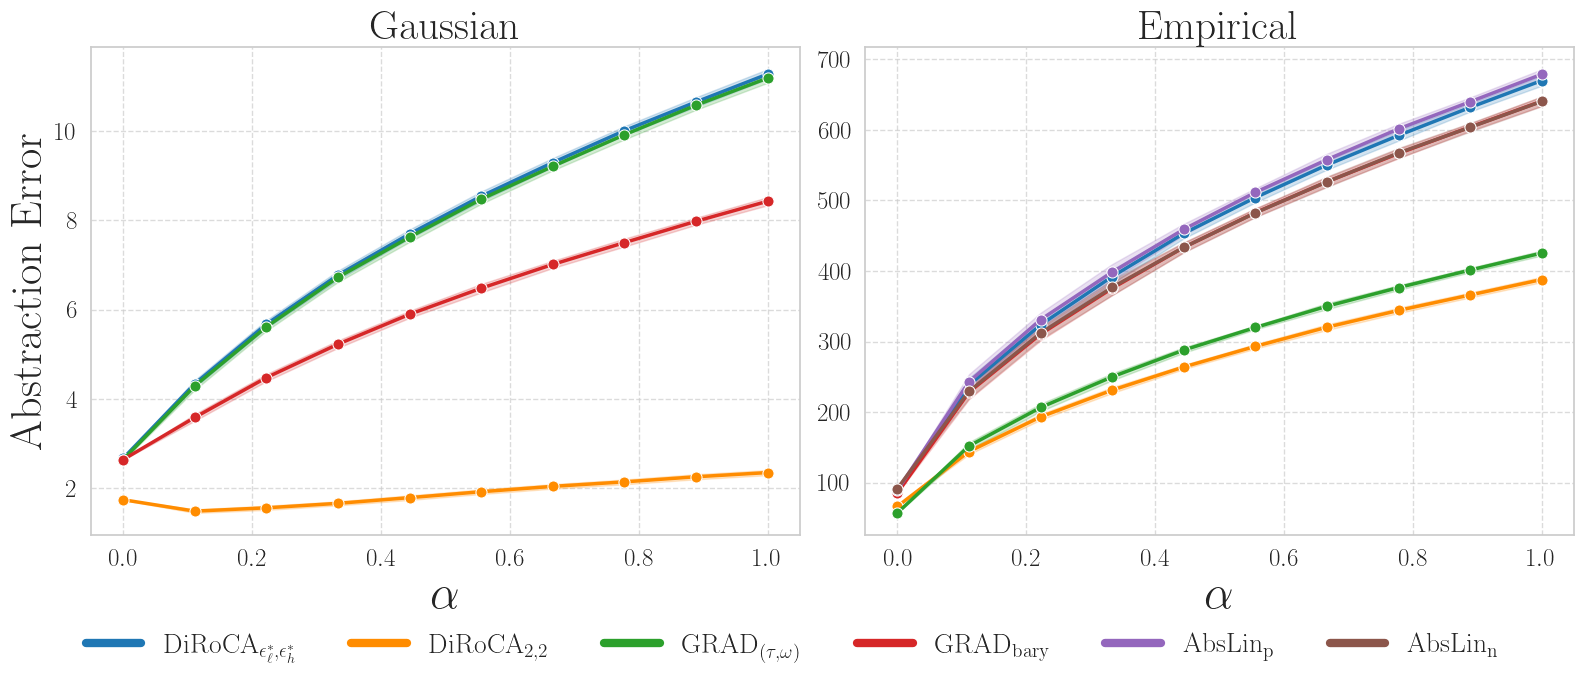

Data loaded for 'lilucas'.
Loading: evaluation_additive_gaussian_alpha10-0.0-1.0_noise20-0.0-10.0_trials20_zero_meanTrue_20250726_160926.csv
Parameters: gaussian additive gaussian, α: 10 steps (0.0-1.0), noise: 20 steps (0.0-10.0), trials: 20, zero_mean: True
Data loaded for 'lilucas'.
Loading: empirical_evaluation_additive_gaussian_alpha10-0.0-1.0_noise20-0.0-10.0_trials20_zero_meanTrue_20250727_132334.csv
Parameters: empirical additive gaussian, α: 10 steps (0.0-1.0), noise: 20 steps (0.0-10.0), trials: 20, zero_mean: True


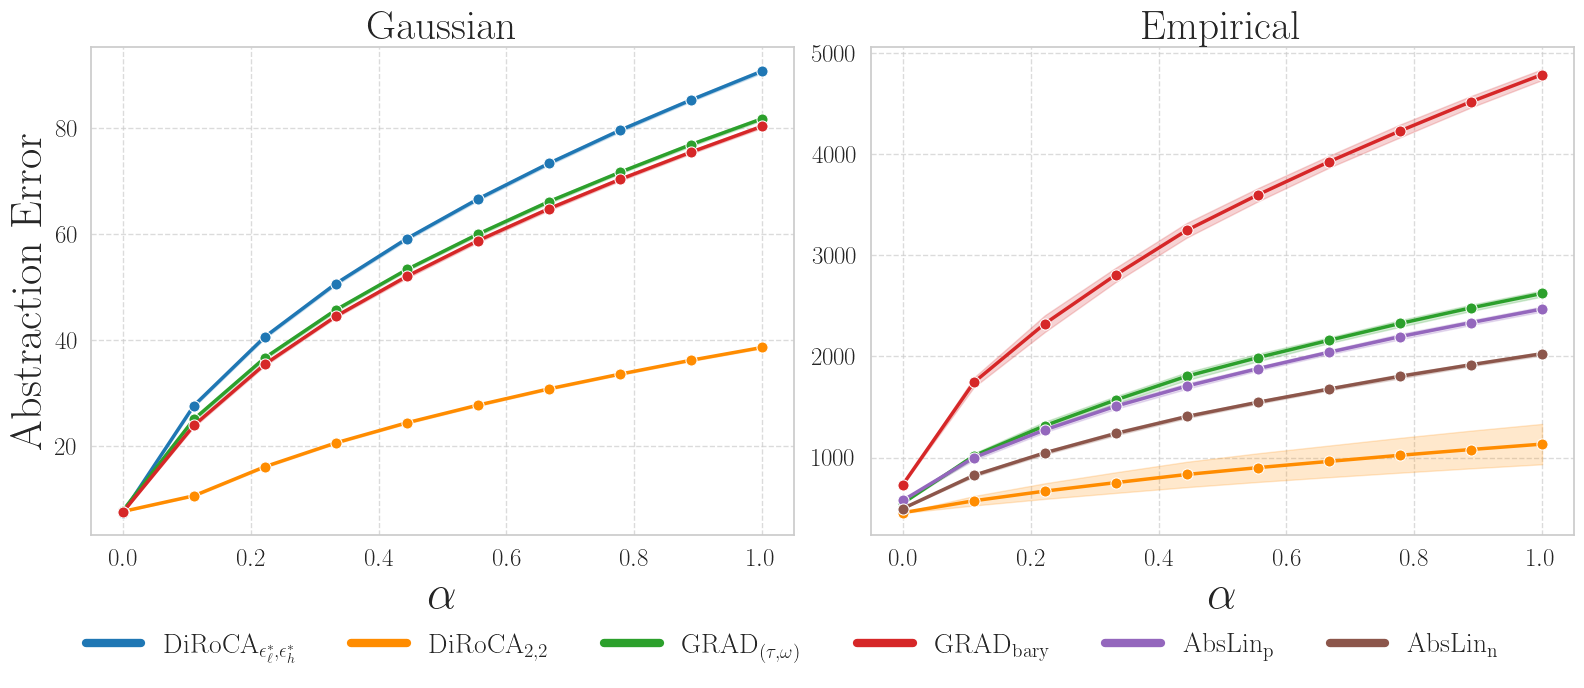

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# LaTeX + serif setup
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "serif",
    "font.serif": ["Computer Modern Roman"],
    "text.latex.preamble": r"\usepackage{amsmath} \usepackage{amssymb}"
})

# Methods and display labels
methods_to_plot = [
    'DiRoCA_star', 'DIROCA_2', 'GradCA', 'BARYCA', 'Abslin_p', 'Abslin_n'
]
display_names = [print_label_map[m] for m in methods_to_plot]

# Color palette (colorblind-friendly)
palette_colors = sns.color_palette('colorblind', n_colors=len(display_names))
color_map = dict(zip(display_names, palette_colors))
color_map = {
    r'DiRoCA$_{\epsilon_\ell^*, \epsilon_h^*}$': '#1f77b4',  # blue
    r'DiRoCA$_{2,2}$': 'darkorange',                            # steel blue (distinct from brown)
    r'GRAD$_{(\tau, \omega)}$': '#2ca02c',                  # green
    r'GRAD$_{\text{bary}}$': '#d62728',                     # red/orange
    r'AbsLin$_{\text{p}}$': '#9467bd',                      # purple
    r'AbsLin$_{\text{n}}$': '#8c564b'                       # brown
}
# Fixed noise levels per dataset
noise_level_to_plot = {
    'slc': 5.0,
    'lilucas': 10.0
}

# Loop through datasets
for experiment in ['slc', 'lilucas']:
    fig, axes = plt.subplots(1, 2, figsize=(16, 7), sharey=False)
    combined_handles = {}

    for i, noise_type in enumerate(['gaussian', 'empirical']):
        all_data = ut.load_all_data(experiment)

        df = load_results(
            experiment=experiment,
            evaluation_type=noise_type,
            shift_type='additive',
            distribution='gaussian',
            alpha_steps=10,
            alpha_min=0.0,
            alpha_max=1.0,
            noise_steps=20,
            noise_min=0.0,
            noise_max=noise_level_to_plot[experiment],
            trials=20,
            zero_mean=True
        )

        # Replace method names
        if noise_type == 'empirical':
            df['method'] = df['method'].replace(label_map_empirical)
        else:
            df['method'] = df['method'].replace(label_map_gaussian)

        # Filter subset
        df = df[
            (df['noise_scale'] == noise_level_to_plot[experiment]) &
            (df['method'].isin(methods_to_plot))
        ].copy()

        if df.empty:
            print(f"No data for {noise_type} in {experiment}")
            continue

        df['display_name'] = df['method'].map(print_label_map)

        ax = axes[i]
        sns.lineplot(
            data=df,
            x='alpha',
            y='error',
            hue='display_name',
            hue_order=display_names,
            palette=color_map,
            marker='o',
            linewidth=2.5,
            markersize=8,
            errorbar='sd',
            ax=ax,
            legend=False
        )

        ax.set_title(f"{noise_type.capitalize()}", fontsize=30)
        ax.set_xlabel(r'$\alpha$', fontsize=34)
        if i == 0:
            ax.set_ylabel('Abstraction Error', fontsize=32)
        else:
            ax.set_ylabel('')

        ax.tick_params(axis='both', labelsize=18)
        ax.grid(True, linestyle='--', alpha=0.7)

        # Collect handles
        handles, labels = ax.get_legend_handles_labels()
        for h, l in zip(handles, labels):
            if l not in combined_handles:
                combined_handles[l] = h

    # Legend with all methods
    ordered_handles = [
        combined_handles.get(lbl, plt.Line2D([], [], color=color_map[lbl], linestyle='-', linewidth=6, label=lbl))
        for lbl in display_names
    ]

    fig.legend(ordered_handles, display_names,
               loc='lower center', ncol=6, fontsize=20, frameon=False)

    fig.tight_layout(rect=[0, 0.08, 1, 1])
    plt.savefig(f"abstraction_vs_alpha_{experiment}_solidlines.png", dpi=300, bbox_inches='tight')
    plt.show()


Data loaded for 'slc'.
Loading: evaluation_additive_gaussian_alpha10-0.0-1.0_noise20-0.0-5.0_trials20_zero_meanTrue_20250726_132833.csv
Parameters: gaussian additive gaussian, α: 10 steps (0.0-1.0), noise: 20 steps (0.0-5.0), trials: 20, zero_mean: True
Data loaded for 'slc'.
Loading: empirical_evaluation_additive_gaussian_alpha10-0.0-1.0_noise20-0.0-5.0_trials20_zero_meanTrue_20250727_113949.csv
Parameters: empirical additive gaussian, α: 10 steps (0.0-1.0), noise: 20 steps (0.0-5.0), trials: 20, zero_mean: True


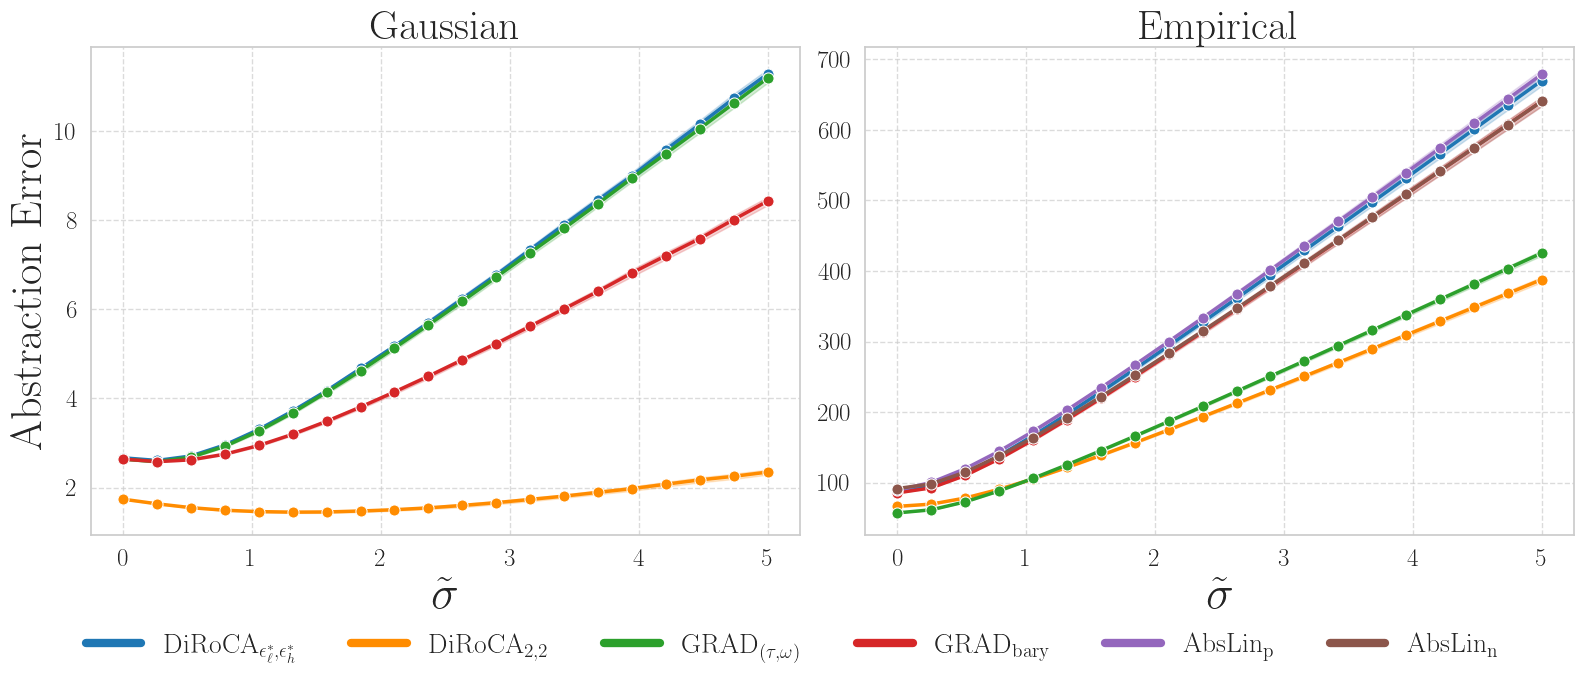

Data loaded for 'lilucas'.
Loading: evaluation_additive_gaussian_alpha10-0.0-1.0_noise20-0.0-10.0_trials20_zero_meanTrue_20250726_160926.csv
Parameters: gaussian additive gaussian, α: 10 steps (0.0-1.0), noise: 20 steps (0.0-10.0), trials: 20, zero_mean: True
Data loaded for 'lilucas'.
Loading: empirical_evaluation_additive_gaussian_alpha10-0.0-1.0_noise20-0.0-10.0_trials20_zero_meanTrue_20250727_132334.csv
Parameters: empirical additive gaussian, α: 10 steps (0.0-1.0), noise: 20 steps (0.0-10.0), trials: 20, zero_mean: True


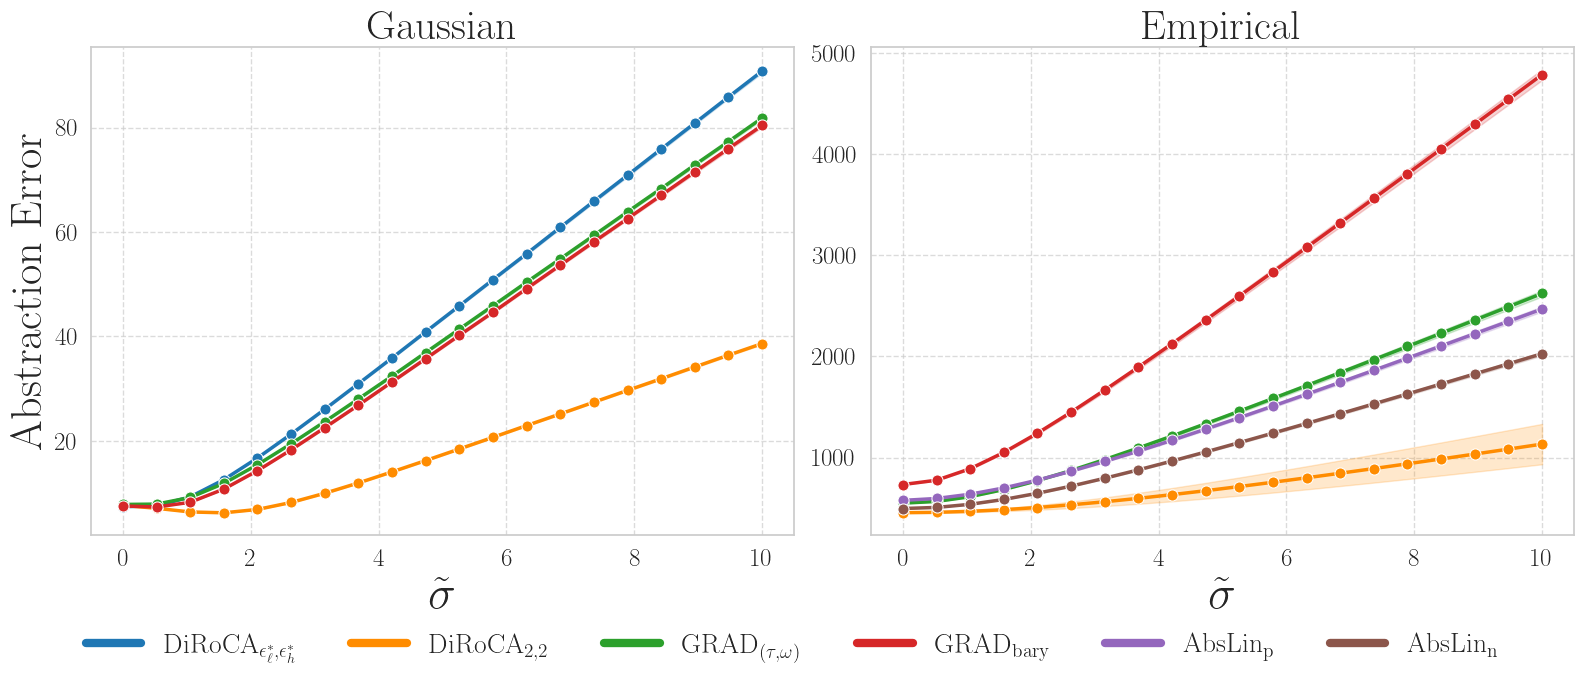

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# LaTeX + serif setup
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "serif",
    "font.serif": ["Computer Modern Roman"],
    "text.latex.preamble": r"\usepackage{amsmath} \usepackage{amssymb}"
})

# Method sets and display labels
methods_to_plot = [
    'DiRoCA_star', 'DIROCA_2', 'GradCA', 'BARYCA', 'Abslin_p', 'Abslin_n'
]
display_names = [print_label_map[m] for m in methods_to_plot]

# Color map
color_map = {
    r'DiRoCA$_{\epsilon_\ell^*, \epsilon_h^*}$': '#1f77b4',
    r'DiRoCA$_{2,2}$': 'darkorange',
    r'GRAD$_{(\tau, \omega)}$': '#2ca02c',
    r'GRAD$_{\text{bary}}$': '#d62728',
    r'AbsLin$_{\text{p}}$': '#9467bd',
    r'AbsLin$_{\text{n}}$': '#8c564b'
}

# Fixed alpha values
fixed_alpha_to_plot = {
    'slc': 1.0,
    'lilucas': 1.0
}

# Main loop
for experiment in ['slc', 'lilucas']:
    fig, axes = plt.subplots(1, 2, figsize=(16, 7), sharey=False)
    combined_handles = {}

    for i, noise_type in enumerate(['gaussian', 'empirical']):
        all_data = ut.load_all_data(experiment)

        df = load_results(
            experiment=experiment,
            evaluation_type=noise_type,
            shift_type='additive',
            distribution='gaussian',
            alpha_steps=10,
            alpha_min=0.0,
            alpha_max=1.0,
            noise_steps=20,
            noise_min=0.0,
            noise_max=5.0 if experiment == 'slc' else 10.0,
            trials=20,
            zero_mean=True
        )

        if noise_type == 'empirical':
            df['method'] = df['method'].replace(label_map_empirical)
        else:
            df['method'] = df['method'].replace(label_map_gaussian)

        df = df[
            (np.abs(df['alpha'] - fixed_alpha_to_plot[experiment]) < 1e-4) &
            (df['method'].isin(methods_to_plot))
        ].copy()

        if df.empty:
            print(f"No data for {noise_type} in {experiment}")
            continue

        df['display_name'] = df['method'].map(print_label_map)

        ax = axes[i]
        sns.lineplot(
            data=df,
            x='noise_scale',
            y='error',
            hue='display_name',
            hue_order=display_names,
            palette=color_map,
            marker='o',
            linewidth=2.5,
            markersize=8,
            errorbar='sd',
            ax=ax,
            legend=False
        )

        ax.set_title(f"{noise_type.capitalize()}", fontsize=30)
        ax.set_xlabel(r'$\tilde{\sigma}$', fontsize=34)
        if i == 0:
            ax.set_ylabel('Abstraction Error', fontsize=32)
        else:
            ax.set_ylabel('')

        ax.tick_params(axis='both', labelsize=18)
        ax.grid(True, linestyle='--', alpha=0.7)

        # Gather handles
        handles, labels = ax.get_legend_handles_labels()
        for h, l in zip(handles, labels):
            if l not in combined_handles:
                combined_handles[l] = h

    # Bottom legend
    ordered_handles = [
        combined_handles.get(lbl, plt.Line2D([], [], color=color_map[lbl], linestyle='-', linewidth=6, label=lbl))
        for lbl in display_names
    ]

    fig.legend(ordered_handles, display_names,
               loc='lower center', ncol=6, fontsize=20, frameon=False)

    fig.tight_layout(rect=[0, 0.08, 1, 1])
    plt.savefig(f"abstraction_vs_noise_{experiment}_alpha_fixed.png", dpi=300, bbox_inches='tight')
    plt.show()


Loading: empirical_evaluation_additive_gaussian_alpha10-0.0-1.0_noise20-0.0-5.0_trials20_zero_meanTrue_20250727_113949.csv
Parameters: empirical additive gaussian, α: 10 steps (0.0-1.0), noise: 20 steps (0.0-5.0), trials: 20, zero_mean: True


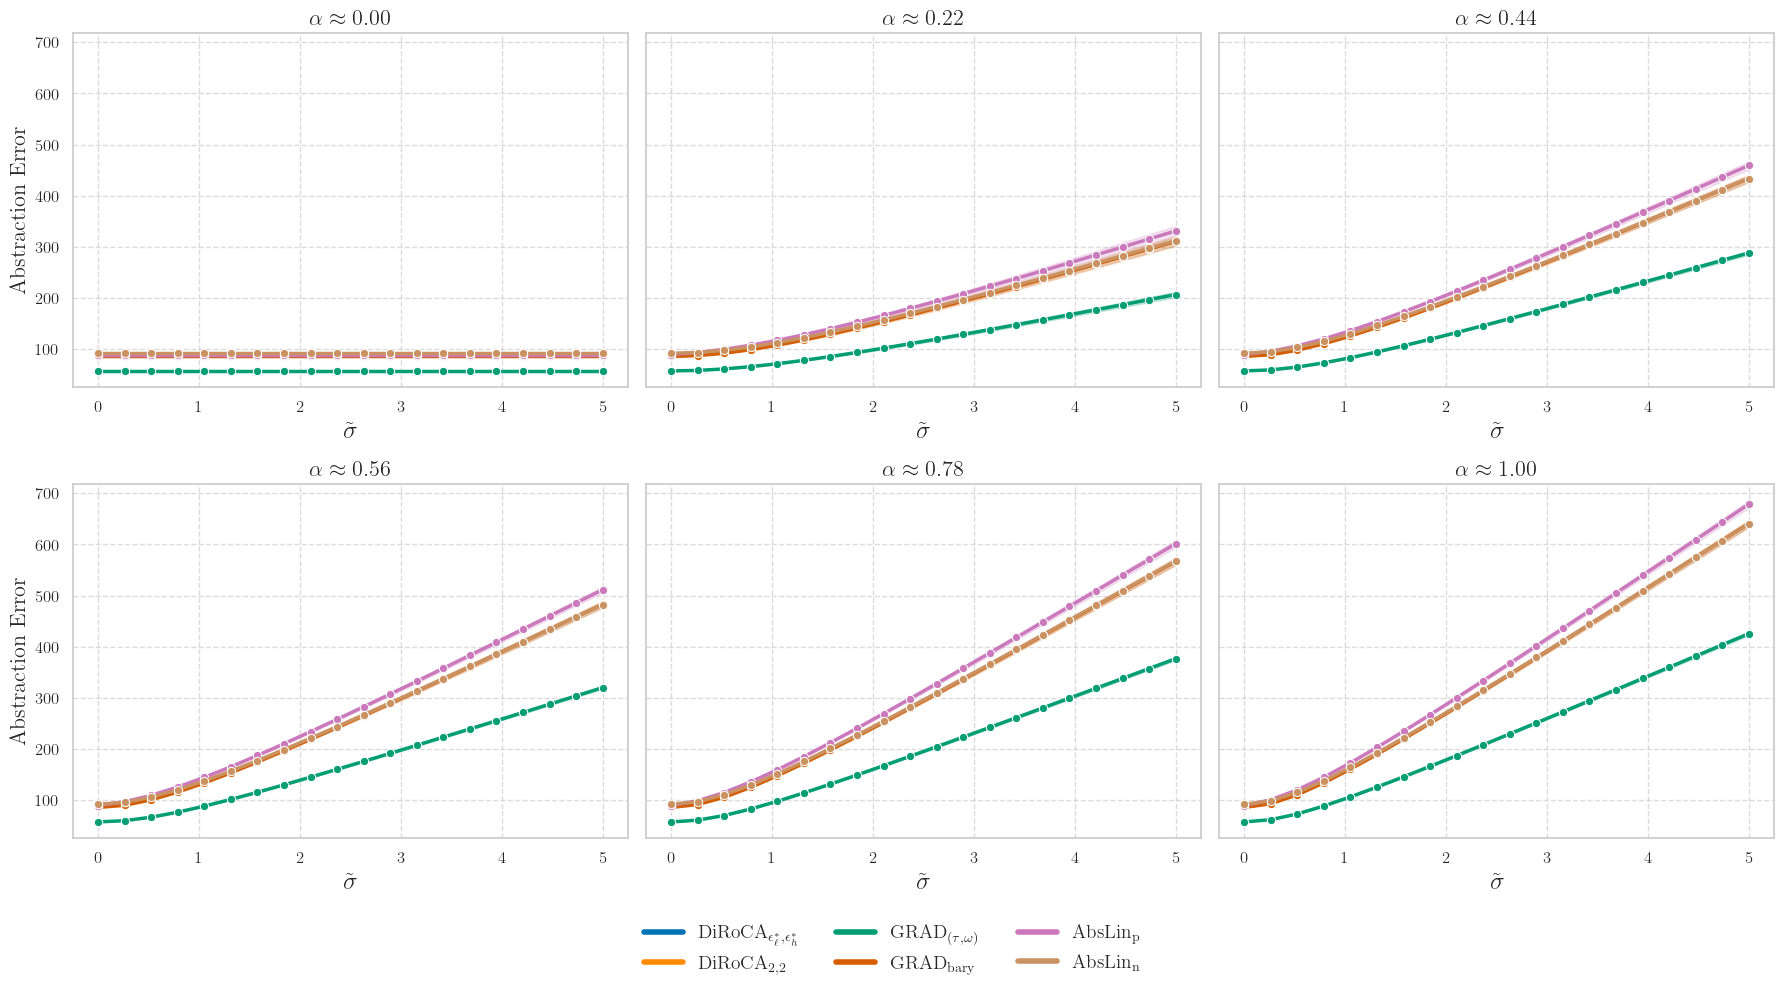

Loading: empirical_evaluation_additive_gaussian_alpha10-0.0-1.0_noise20-0.0-10.0_trials20_zero_meanTrue_20250727_132334.csv
Parameters: empirical additive gaussian, α: 10 steps (0.0-1.0), noise: 20 steps (0.0-10.0), trials: 20, zero_mean: True


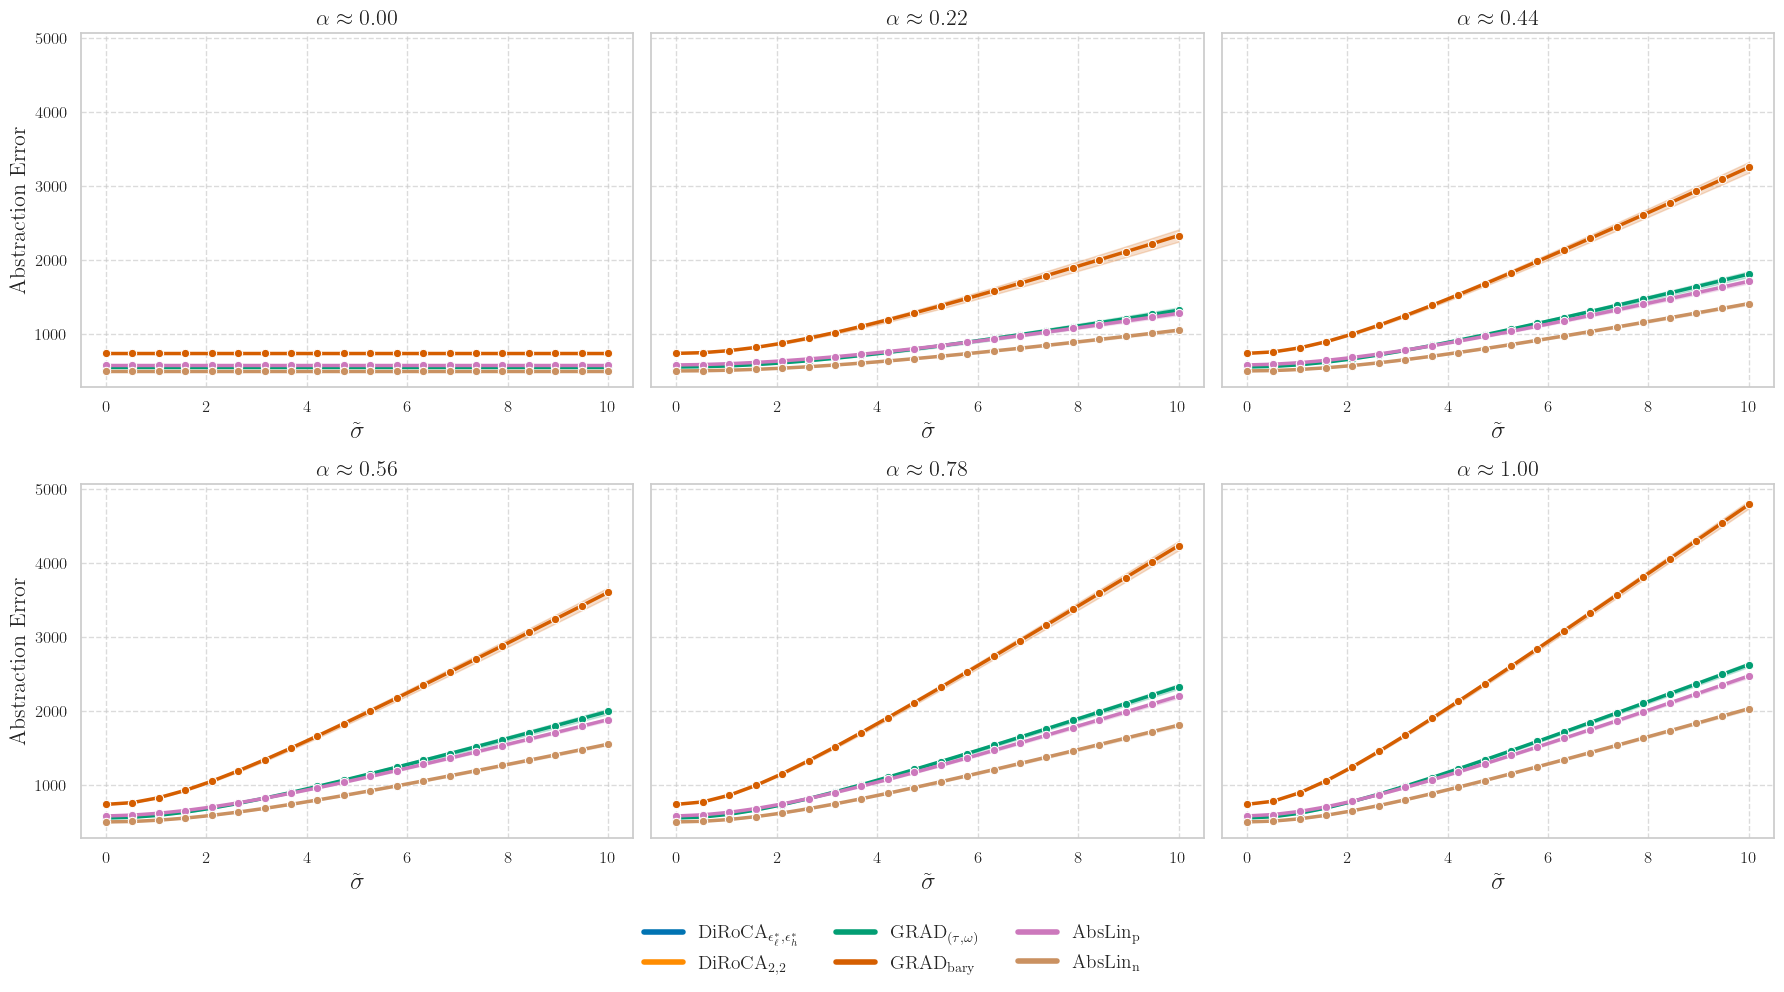

In [42]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from matplotlib.lines import Line2D

from load_results import load_results, list_available_results

# Label maps
label_map_gaussian = {
    'DIROCA (eps_delta_0.111)': 'DiRoCA_star',
    'DIROCA (eps_delta_2)': 'DIROCA_2',
    'GradCA': 'GradCA',
    'BARYCA': 'BARYCA',
    'Abs-LiNGAM (Perfect)': 'Abslin_p',
    'Abs-LiNGAM (Noisy)': 'Abslin_n'
}
print_label_map = {
    'DiRoCA_star':  r'DiRoCA$_{\epsilon_\ell^*, \epsilon_h^*}$',
    'DIROCA_2':     r'DiRoCA$_{2,2}$',
    'GradCA':       r'GRAD$_{(\tau, \omega)}$',
    'BARYCA':       r'GRAD$_{\text{bary}}$',
    'Abslin_p':     r'AbsLin$_{\text{p}}$',
    'Abslin_n':     r'AbsLin$_{\text{n}}$'
}

methods_to_plot = list(print_label_map.keys())
display_names = [print_label_map[m] for m in methods_to_plot]
palette = sns.color_palette('colorblind', len(display_names))
color_map = dict(zip(display_names, palette))
color_map[r'DiRoCA$_{2,2}$'] = 'darkorange'

# Loop over experiments
for experiment in ['slc', 'lilucas']:
    df = load_results(
        experiment=experiment,
        evaluation_type='empirical',
        shift_type='additive',
        distribution='gaussian',
        alpha_steps=10,
        alpha_min=0.0,
        alpha_max=1.0,
        noise_steps=20,
        noise_min=0.0,
        noise_max=5.0 if experiment == 'slc' else 10.0,
        trials=20,
        zero_mean=True
    )
    
    df['method'] = df['method'].replace(label_map_gaussian)
    df = df[df['method'].isin(methods_to_plot)].copy()
    df['display_name'] = df['method'].map(print_label_map)

    requested_alphas = np.array([0.0, 0.2, 0.4, 0.6, 0.8, 1.0])
    actual_alphas = np.sort(df['alpha'].unique())
    closest_alphas = [actual_alphas[np.abs(actual_alphas - a).argmin()] for a in requested_alphas]

    fig, axes = plt.subplots(2, 3, figsize=(18, 10), sharey=True)
    axes = axes.flatten()

    for i, alpha_val in enumerate(closest_alphas):
        ax = axes[i]
        sub_df = df[np.isclose(df['alpha'], alpha_val)]

        sns.lineplot(
            data=sub_df,
            x='noise_scale',
            y='error',
            hue='display_name',
            hue_order=display_names,
            palette=color_map,
            marker='o',
            linewidth=2.5,
            markersize=6,
            errorbar='sd',
            ax=ax,
            legend=False
        )

        ax.set_title(rf"$\alpha \approx {alpha_val:.2f}$", fontsize=16)
        ax.set_xlabel(r'$\tilde{\sigma}$', fontsize=18)
        if i % 3 == 0:
            ax.set_ylabel('Abstraction Error', fontsize=16)
        else:
            ax.set_ylabel('')
        ax.tick_params(axis='both', labelsize=12)
        ax.grid(True, linestyle='--', alpha=0.7)

    # Shared legend
    handles = [Line2D([], [], color=color_map[label], label=label, linewidth=4)
               for label in display_names]
    fig.legend(handles, display_names, loc='lower center', ncol=3, fontsize=14, frameon=False)

    fig.tight_layout(rect=[0, 0.08, 1, 1])
    plt.savefig(f"abstraction_vs_noise_alpha_panels_gaussian_{experiment}.png", dpi=300, bbox_inches='tight')
    plt.show()


In [28]:
type

type

In [29]:
final_results_df = load_results(
                                    experiment=experiment,
                                    evaluation_type='empirical',
                                    shift_type='additive',
                                    distribution='gaussian',
                                    alpha_steps=10,
                                    alpha_min=0.0,
                                    alpha_max=1.0,
                                    noise_steps=20,
                                    noise_min=0.0,
                                    noise_max=10.0,
                                    trials=20,
                                    zero_mean=True
                                )

Loading: empirical_evaluation_additive_gaussian_alpha10-0.0-1.0_noise20-0.0-10.0_trials20_zero_meanTrue_20250727_132334.csv
Parameters: empirical additive gaussian, α: 10 steps (0.0-1.0), noise: 20 steps (0.0-10.0), trials: 20, zero_mean: True


In [30]:
label_map_empirical = {
                        'DIROCA (eps_0.107_delta_0.035)': 'DiRoCA_star',
                        'DIROCA (eps_1.0_delta_1.0)': 'DIROCA_1',
                        'DIROCA (eps_2.0_delta_2.0)': 'DIROCA_2',
                        'DIROCA (eps_4.0_delta_4.0)': 'DIROCA_4',
                        'DIROCA (eps_8.0_delta_8.0)': 'DIROCA_8',
                        'GradCA': 'GradCA',
                        'BARYCA': 'BARYCA',
                        'Abs-LiNGAM (Perfect)': 'Abslin_p',
                        'Abs-LiNGAM (Noisy)': 'Abslin_n'
                    }
label_map_gaussian = {
                        'DIROCA (eps_delta_0.111)': 'DiRoCA_star',
                        'DIROCA (eps_delta_1)': 'DIROCA_1',
                        'DIROCA (eps_delta_2)': 'DIROCA_2',
                        'DIROCA (eps_delta_4)': 'DIROCA_4',
                        'DIROCA (eps_delta_8)': 'DIROCA_8',
                        'GradCA': 'GradCA',
                        'BARYCA': 'BARYCA'
                    }

In [31]:
if type == 'empirical':
    final_results_df['method'] = final_results_df['method'].replace(label_map_empirical)
elif type == 'gaussian':
    final_results_df['method'] = final_results_df['method'].replace(label_map_gaussian)

In [32]:
print_label_map  = {
                        'DiRoCA_star':  r'DiRoCA$_{\epsilon_\ell^*, \epsilon_h^*}$',
                        'DIROCA_1':     r'DiRoCA$_{1,1}$',
                        'DIROCA_2':     r'DiRoCA$_{2,2}$',
                        'DIROCA_4':     r'DiRoCA$_{4,4}$',
                        'DIROCA_8':     r'DiRoCA$_{8,8}$',
                        'GradCA':       r'GRAD$_{(\tau, \omega)}$',
                        'BARYCA':       r'GRAD$_{\text{bary}}$',
                        'Abslin_p':     r'AbsLin$_{\text{p}}$', 
                        'Abslin_n':     r'AbsLin$_{\text{n}}$'
                    }

### 0-shift

In [177]:
df_clean             = final_results_df[final_results_df['alpha']==0.0]
summary_stats        = df_clean.groupby(['method'])['error'].agg(['mean', 'std', 'count'])
#summary_stats['sem'] = summary_stats['std'] / np.sqrt(summary_stats['count'])
summary_stats['sem'] = summary_stats['std']

print("--- Final Summary (Mean Error ± SEM) ---")

# 2. Now, print the results in your custom table format
print("\n" + "="*65)
print(f"{'Method/Run':<45} | {'Mean Error ± Standard Error of Mean (SEM)'}")
print("="*65)

# The 'method' is now in the index of the summary table
for method_name, row in summary_stats.iterrows():
    mean_val = row['mean']
    sem_val = row['sem']
    
    # The method_name from the index is already the clean display name
    print(f"{method_name:<45} | {mean_val:>7.4f} ± {sem_val:.4f}")

print("="*65)

--- Final Summary (Mean Error ± SEM) ---

Method/Run                                    | Mean Error ± Standard Error of Mean (SEM)
BARYCA                                        |  7.5448 ± 0.0077
DIROCA_1                                      |  7.7972 ± 0.0304
DIROCA_2                                      |  7.6567 ± 0.0367
DIROCA_4                                      |  8.1671 ± 0.0351
DIROCA_8                                      |  8.7413 ± 0.0198
DiRoCA_star                                   |  7.3967 ± 0.0223
GradCA                                        |  7.8334 ± 0.0312


### Point comparison

In [178]:
alpha_point = 1.0
noise_level_point = 10

# df_point            = final_results_df[(final_results_df['alpha']==alpha_point) & (final_results_df['noise_scale']==noise_level_point)]
df_point            = final_results_df[np.isclose(final_results_df['alpha'],alpha_point) & np.isclose(final_results_df['noise_scale'],noise_level_point)]

summary_stats        = df_point.groupby(['method'])['error'].agg(['mean', 'std', 'count'])
summary_stats['sem'] = summary_stats['std'] #/ np.sqrt(summary_stats['count'])

print("--- Final Summary (Mean Error ± SEM) ---")

# 2. Now, print the results in your custom table format
print("\n" + "="*65)
print(f"{'Method/Run':<45} | {'Mean Error ± Standard Error of Mean (SEM)'}")
print("="*65)

# The 'method' is now in the index of the summary table
for method_name, row in summary_stats.iterrows():
    mean_val = row['mean']
    sem_val = row['sem']
    
    # The method_name from the index is already the clean display name
    print(f"{method_name:<45} | {mean_val:>7.4f} ± {sem_val:.4f}")

print("="*65)

--- Final Summary (Mean Error ± SEM) ---

Method/Run                                    | Mean Error ± Standard Error of Mean (SEM)
BARYCA                                        | 80.4014 ± 0.3204
DIROCA_1                                      | 42.8519 ± 0.1686
DIROCA_2                                      | 38.6331 ± 0.1742
DIROCA_4                                      | 12.5170 ± 0.0862
DIROCA_8                                      | 12.4358 ± 0.0939
DiRoCA_star                                   | 90.8162 ± 0.3533
GradCA                                        | 81.8246 ± 0.3136


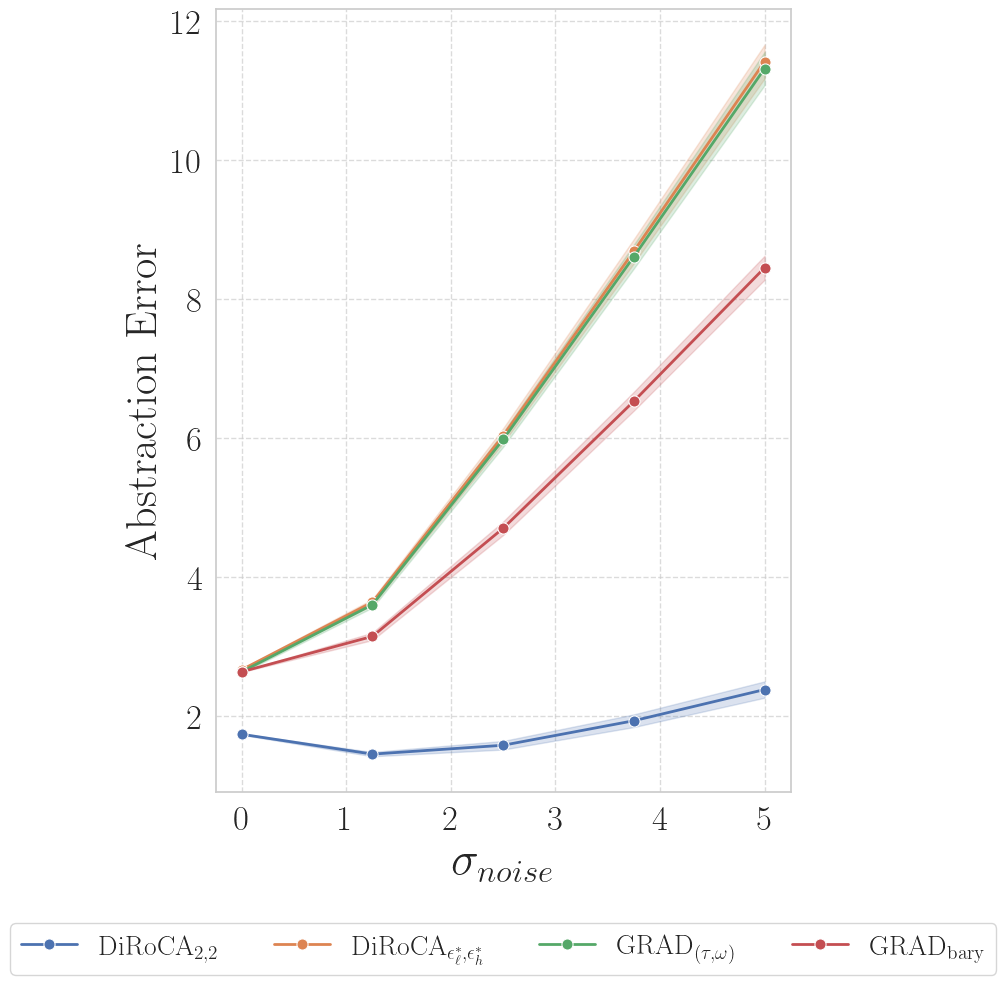


Alternative: Plotting against alpha (fixing noise)


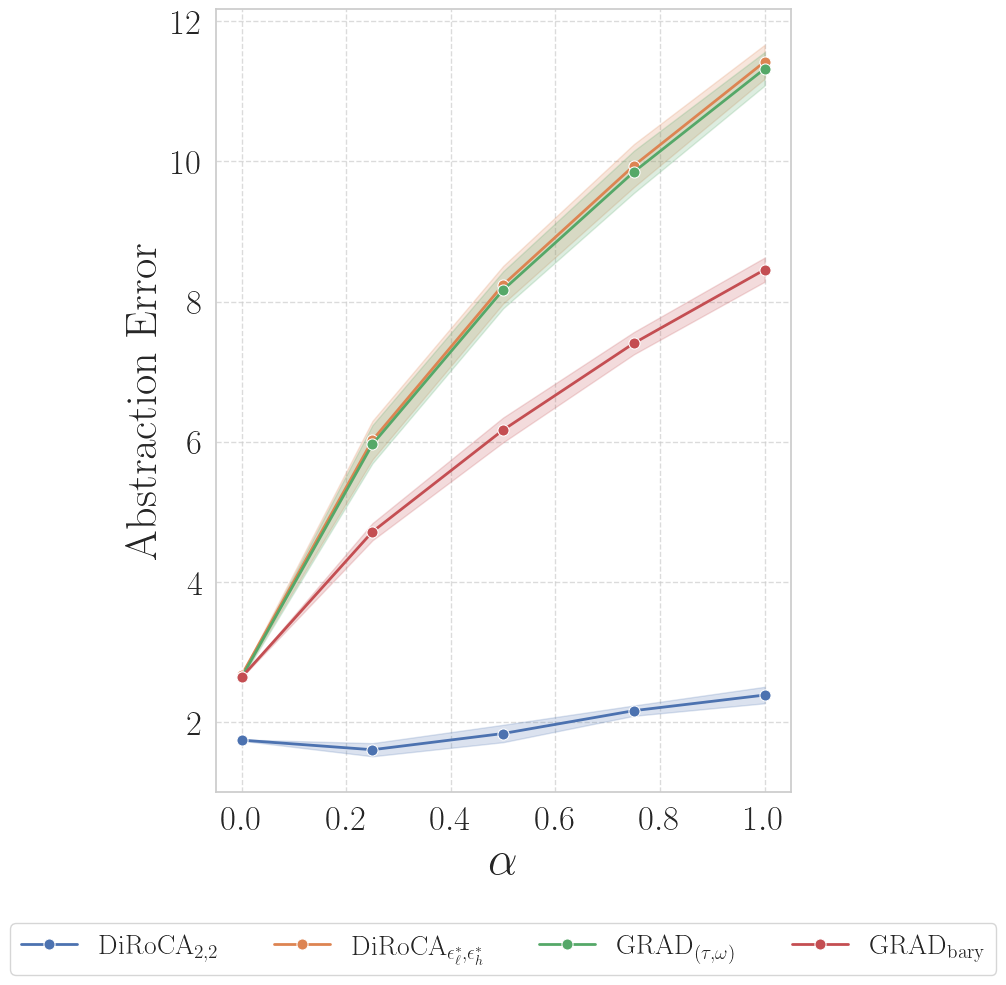

In [8]:
# Enhanced Plotting Code for Empirical Analysis
# Copy this code into a new cell in your empirical_analysis.ipynb

# Enable LaTeX rendering
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "serif",
    "font.serif": ["Computer Modern Roman"],
    "text.latex.preamble": r"\usepackage{amsmath} \usepackage{amssymb}"
})

methods_to_plot = [
    'DiRoCA_star',
    #'DIROCA_1',
    'DIROCA_2', 
    #'DIROCA_4',
    #'DIROCA_8',
    'GradCA',
    'BARYCA',
    'Abslin_p',
    'Abslin_n'
]

alpha_to_plot = 1.0

# Filter data for selected alpha and methods
df_subset = final_results_df[
    (final_results_df['alpha'] == alpha_to_plot) & 
    (final_results_df['method'].isin(methods_to_plot))
]

if df_subset.empty:
    print(f"Warning: No data found for alpha ≈ {alpha_to_plot}. Please check the 'alpha_values' in your experiment.")
else:
    df_for_plotting = df_subset.copy()
    df_for_plotting['display_name'] = df_for_plotting['method'].map(print_label_map)

    plt.figure(figsize=(9, 10))
    sns.lineplot(
        data=df_for_plotting,
        x='noise_scale',
        y='error',
        hue='display_name',
        marker='o',
        linewidth=2.0,
        markersize=8,
        errorbar= 'sd' #('ci', 95) # Shaded area is the 95% CI across folds and trials
    )
    
    # No title as requested
    plt.xlabel(r'$\sigma_{noise}$', fontsize=34)
    plt.ylabel(r'Abstraction Error', fontsize=32)
    plt.legend(fontsize=20, bbox_to_anchor=(0.5, -0.15), loc='upper center', ncol=4)
    plt.grid(True, which='both', linestyle='--', alpha=0.7)
    
    # Increase tick label sizes
    plt.xticks(fontsize=25)
    plt.yticks(fontsize=25)
    
    plt.tight_layout()
    plt.savefig(f'{experiment}_{type}_alpha_fixed_{alpha_to_plot}.png', dpi=300, bbox_inches='tight')
    plt.show()

# Alternative version for plotting against alpha (fixing noise)
print("\n" + "="*60)
print("Alternative: Plotting against alpha (fixing noise)")
print("="*60)

noise_level_to_plot = noise_max

# Filter data for selected noise level and methods
df_subset_alpha = final_results_df[
    (final_results_df['noise_scale'] == noise_level_to_plot) & 
    (final_results_df['method'].isin(methods_to_plot))
]

if df_subset_alpha.empty:
    print(f"Warning: No data found for noise_scale ≈ {noise_level_to_plot}.")
else:
    df_for_plotting_alpha = df_subset_alpha.copy()
    df_for_plotting_alpha['display_name'] = df_for_plotting_alpha['method'].map(print_label_map)

    plt.figure(figsize=(9, 10))
    sns.lineplot(
        data=df_for_plotting_alpha,
        x='alpha',
        y='error',
        hue='display_name',
        marker='o',
        linewidth=2.0,
        markersize=8,
        errorbar= 'sd' #('ci', 95)
    )
    
    plt.xlabel(r'$\alpha$', fontsize=34)
    plt.ylabel(r'Abstraction Error', fontsize=32)
    #plt.legend(fontsize=20)
    plt.legend(fontsize=20, bbox_to_anchor=(0.5, -0.15), loc='upper center', ncol=4)

    plt.grid(True, which='both', linestyle='--', alpha=0.7)
    
    # Increase tick label sizes
    plt.xticks(fontsize=25)
    plt.yticks(fontsize=25)
    
    plt.tight_layout()
    plt.savefig(f'{experiment}_{type}_noise_fixed_{noise_level_to_plot}.png', dpi=300, bbox_inches='tight')
    plt.show()

In [ ]:
label_map = {
    'DIROCA (eps_0.107_delta_0.035)': r'DiRoCA$_{\epsilon_\ell^*, \epsilon_h^*}$',
    'DIROCA (eps_delta_1)':     r'DiRoCA$_{1,1}$',
    'DIROCA (eps_delta_2)':     r'DiRoCA$_{2,2}$',
    'DIROCA (eps_delta_4)':     r'DiRoCA$_{4,4}$',
    'DIROCA (eps_delta_8)':     r'DiRoCA$_{8,8}$',
    'GradCA':                   r'GRAD$_{(\tau, \omega)}$',
    'BARYCA':                   r'GRAD$_{\text{bary}}$',
    'Abs-LiNGAM (Perfect)':     r'AbsLin$_{\text{p}}$', 
    'Abs-LiNGAM (Noisy)':       r'AbsLin$_{\text{n}}$'
}

In [ ]:
label_map = {
    'DIROCA (eps_0.107_delta_0.035)': r'DiRoCA$_{\epsilon_\ell^*, \epsilon_h^*}$',
    'DIROCA (eps_delta_1)':     r'DiRoCA$_{1,1}$',
    'DIROCA (eps_delta_2)':     r'DiRoCA$_{2,2}$',
    'DIROCA (eps_delta_4)':     r'DiRoCA$_{4,4}$',
    'DIROCA (eps_delta_8)':     r'DiRoCA$_{8,8}$',
    'GradCA':                   r'GRAD$_{(\tau, \omega)}$',
    'BARYCA':                   r'GRAD$_{\text{bary}}$',
    'Abs-LiNGAM (Perfect)':     r'AbsLin$_{\text{p}}$', 
    'Abs-LiNGAM (Noisy)':       r'AbsLin$_{\text{n}}$'
}

### Fix/vary curves

In [16]:
label_map = {
    'DIROCA (eps_0.107_delta_0.035)': r'DiRoCA$_{\epsilon_\ell^*, \epsilon_h^*}$',
    'DIROCA (eps_delta_1)':     r'DiRoCA$_{1,1}$',
    'DIROCA (eps_delta_2)':     r'DiRoCA$_{2,2}$',
    'DIROCA (eps_delta_4)':     r'DiRoCA$_{4,4}$',
    'DIROCA (eps_delta_8)':     r'DiRoCA$_{8,8}$',
    'GradCA':                   r'GRAD$_{(\tau, \omega)}$',
    'BARYCA':                   r'GRAD$_{\text{bary}}$',
    'Abs-LiNGAM (Perfect)':     r'AbsLin$_{\text{p}}$', 
    'Abs-LiNGAM (Noisy)':       r'AbsLin$_{\text{n}}$'
}

### Fix alpha

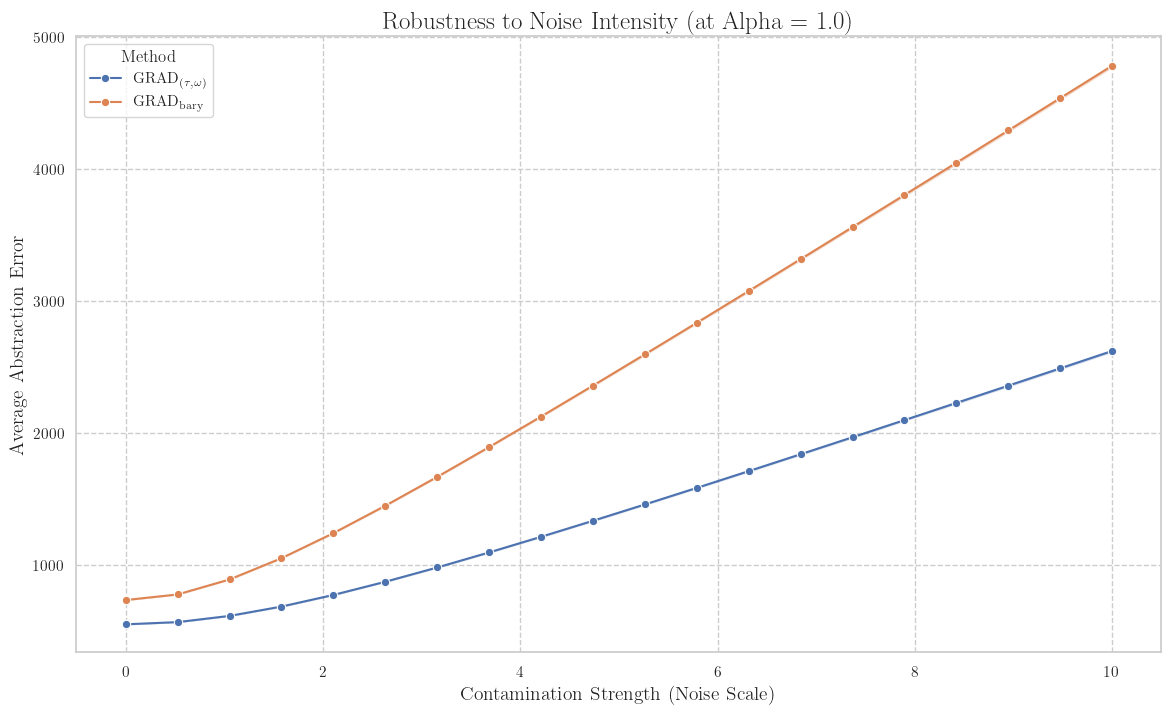

In [34]:
alpha_to_plot = 1.0

df_subset = final_results_df[final_results_df['alpha'] == alpha_to_plot]

if df_subset.empty:
    print(f"Warning: No data found for alpha ≈ {alpha_to_plot}. Please check the 'alpha_values' in your experiment.")
else:
    df_for_plotting = df_subset.copy()
    df_for_plotting['display_name'] = df_for_plotting['method'].map(print_label_map)

    plt.figure(figsize=(14, 8))
    sns.lineplot(
        data=df_for_plotting,
        x='noise_scale',
        y='error',
        hue='display_name',
        marker='o',
        linewidth=1.5,
        errorbar=('ci', 95) # Shaded area is the 95% CI across folds and trials
    )
    plt.title(f'Robustness to Noise Intensity (at Alpha = {alpha_to_plot})', fontsize=18)
    plt.xlabel('Contamination Strength (Noise Scale)', fontsize=14)
    plt.ylabel('Average Abstraction Error', fontsize=14)
    plt.legend(title='Method')
    plt.grid(True, which='both', linestyle='--')
    plt.show()

In [36]:
alpha_values = sorted(final_results_df['alpha'].unique())

df_for_plotting = final_results_df.copy()
df_for_plotting['display_name'] = df_for_plotting['method'].map(print_label_map)


fig, ax = plt.subplots(figsize=(14, 8))
y_max   = final_results_df['error'].max()


def update_alpha(alpha):
    ax.clear() # Clear the previous frame
    
    # Filter the data for the current alpha value
    df_subset = df_for_plotting[np.isclose(df_for_plotting['alpha'], alpha)]
    
    # Draw the lineplot for this frame
    sns.lineplot(
        data=df_subset,
        x='noise_scale',
        y='error',
        hue='display_name',
        marker='o',
        errorbar=('ci', 95),
        ax=ax
    )
    
    ax.set_title(f'Robustness to Noise Intensity (at Alpha = {alpha:.2f})', fontsize=18)
    ax.set_xlabel('Contamination Strength (Noise Scale)', fontsize=14)
    ax.set_ylabel('Average Abstraction Error', fontsize=14)
    ax.legend(title='Method')
    ax.grid(True, which='both', linestyle='--')
    ax.set_ylim(0, y_max * 1.1) # Keep y-axis consistent


print("Creating animation for evolving alpha...")
ani_alpha = FuncAnimation(fig, update_alpha, frames=alpha_values, blit=False, repeat=False)

# Save the GIF
ani_alpha.save('robustness_vs_noise_evolving_alpha.gif', writer='pillow', fps=2)
plt.close() # Prevent the final static plot from showing

print("✓ Animation saved as 'robustness_vs_noise_evolving_alpha.gif'")
# HTML(ani_alpha.to_jshtml())

INFO:matplotlib.animation:Animation.save using <class 'matplotlib.animation.PillowWriter'>


Creating animation for evolving alpha...
✓ Animation saved as 'robustness_vs_noise_evolving_alpha.gif'


### Fix Noise

In [12]:
noise_level_to_plot = 5.0

df_subset = final_results_df[final_results_df['noise_scale'] == noise_level_to_plot]

if df_subset.empty:
    print(f"Warning: No data found for noise_scale ≈ {noise_level_to_plot}.")
else:
    df_for_plotting = df_subset.copy()
    df_for_plotting['display_name'] = df_for_plotting['method'].map(print_label_map)

    plt.figure(figsize=(14, 8))
    sns.lineplot(
        data=df_for_plotting,
        x='alpha',
        y='error',
        hue='display_name',
        marker='o',
        linewidth=2.5,
        errorbar=('ci', 95)
    )

    plt.title(f'Robustness to Outlier Fraction (at Noise Scale ≈ {noise_level_to_plot})', fontsize=18)
    plt.xlabel('Contamination Fraction (alpha)', fontsize=14)
    plt.ylabel('Average Abstraction Error', fontsize=14)
    plt.legend(title='Method')
    plt.grid(True, which='both', linestyle='--')
    plt.show()

RuntimeError: latex was not able to process the following string:
b'Robustness to Outlier Fraction (at Noise Scale \\u2248 5.0)'

Here is the full command invocation and its output:

latex -interaction=nonstopmode --halt-on-error --output-directory=tmpehwm6uj4 8e12dcd1dff9b9795fbf1c57f1e4f35b.tex

This is pdfTeX, Version 3.141592653-2.6-1.40.26 (TeX Live 2024) (preloaded format=latex)
 restricted \write18 enabled.
entering extended mode
(./8e12dcd1dff9b9795fbf1c57f1e4f35b.tex
LaTeX2e <2023-11-01> patch level 1
L3 programming layer <2024-02-20>
(/usr/local/texlive/2024/texmf-dist/tex/latex/base/article.cls
Document Class: article 2023/05/17 v1.4n Standard LaTeX document class
(/usr/local/texlive/2024/texmf-dist/tex/latex/base/size10.clo))
(/usr/local/texlive/2024/texmf-dist/tex/latex/type1cm/type1cm.sty)
(/usr/local/texlive/2024/texmf-dist/tex/latex/cm-super/type1ec.sty
(/usr/local/texlive/2024/texmf-dist/tex/latex/base/t1cmr.fd))
(/usr/local/texlive/2024/texmf-dist/tex/latex/base/inputenc.sty)
(/usr/local/texlive/2024/texmf-dist/tex/latex/geometry/geometry.sty
(/usr/local/texlive/2024/texmf-dist/tex/latex/graphics/keyval.sty)
(/usr/local/texlive/2024/texmf-dist/tex/generic/iftex/ifvtex.sty
(/usr/local/texlive/2024/texmf-dist/tex/generic/iftex/iftex.sty)))
(/usr/local/texlive/2024/texmf-dist/tex/latex/amsmath/amsmath.sty
For additional information on amsmath, use the `?' option.
(/usr/local/texlive/2024/texmf-dist/tex/latex/amsmath/amstext.sty
(/usr/local/texlive/2024/texmf-dist/tex/latex/amsmath/amsgen.sty))
(/usr/local/texlive/2024/texmf-dist/tex/latex/amsmath/amsbsy.sty)
(/usr/local/texlive/2024/texmf-dist/tex/latex/amsmath/amsopn.sty))
(/usr/local/texlive/2024/texmf-dist/tex/latex/amsfonts/amssymb.sty
(/usr/local/texlive/2024/texmf-dist/tex/latex/amsfonts/amsfonts.sty))
(/usr/local/texlive/2024/texmf-dist/tex/latex/underscore/underscore.sty)
(/usr/local/texlive/2024/texmf-dist/tex/latex/firstaid/underscore-ltx.sty)
(/usr/local/texlive/2024/texmf-dist/tex/latex/base/textcomp.sty)
(/usr/local/texlive/2024/texmf-dist/tex/latex/l3backend/l3backend-dvips.def)
No file 8e12dcd1dff9b9795fbf1c57f1e4f35b.aux.
*geometry* driver: auto-detecting
*geometry* detected driver: dvips

! LaTeX Error: Unicode character ≈ (U+2248)
               not set up for use with LaTeX.

See the LaTeX manual or LaTeX Companion for explanation.
Type  H <return>  for immediate help.
 ...                                              
                                                  
l.30 ...ss to Outlier Fraction (at Noise Scale ≈
                                                   5.0)}%
No pages of output.
Transcript written on tmpehwm6uj4/8e12dcd1dff9b9795fbf1c57f1e4f35b.log.




<Figure size 1400x800 with 1 Axes>

In [28]:
noise_levels = sorted(final_results_df['noise_scale'].unique())

df_for_plotting = final_results_df.copy()
df_for_plotting['display_name'] = df_for_plotting['method'].map(label_map)

fig, ax = plt.subplots(figsize=(14, 8))
y_max = final_results_df['error'].max()

def update_noise(scale):
    ax.clear()
    
    # Filter the data for the current noise scale
    df_subset = df_for_plotting[np.isclose(df_for_plotting['noise_scale'], scale)]
    
    # Draw the lineplot for this frame
    sns.lineplot(
        data=df_subset,
        x='alpha',
        y='error',
        hue='display_name',
        marker='o',
        errorbar=('ci', 95),
        ax=ax
    )
    
    ax.set_title(f'Robustness to Outlier Fraction (at Noise Scale ≈ {scale:.2f})', fontsize=18)
    ax.set_xlabel('Contamination Fraction (alpha)', fontsize=14)
    ax.set_ylabel('Average Abstraction Error', fontsize=14)
    ax.legend(title='Method')
    ax.grid(True, which='both', linestyle='--')
    ax.set_ylim(0, y_max * 1.1)


print("Creating animation for evolving noise scale...")
ani_noise = FuncAnimation(fig, update_noise, frames=noise_levels, blit=False, repeat=False)

# Save the GIF
ani_noise.save('robustness_vs_alpha_evolving_noise.gif', writer='pillow', fps=2)
plt.close()

print("✓ Animation saved as 'robustness_vs_alpha_evolving_noise.gif'")
# HTML(ani_noise.to_jshtml())

INFO:matplotlib.animation:Animation.save using <class 'matplotlib.animation.PillowWriter'>


Creating animation for evolving noise scale...
✓ Animation saved as 'robustness_vs_alpha_evolving_noise.gif'
